In [41]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from mvl2 import genData2 as genData
from torch import tensor

In [22]:
simParams = genData.genParams(pis=tensor([.1, .1, .05]), rrMeans=tensor([5., 2.]), afMean = tensor(1e-4), pDs = tensor([.01, .01]), afShape=tensor(50.), nCases=tensor([1.5e4, 1.5e4, 4e3]), nCtrls=tensor(5e4), covShared=tensor([ [1, .95], [.95, 1] ]), covSingle=tensor([ [1., 0.], [0., 1.] ]), meanEffectCovarianceScale=tensor(.01))[0]
simParams["pDs"] = simParams["pDs"][0:2]
simParams

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.9500],
         [0.9500, 1.0000]]),
 'covSingle': tensor([[1., 0.],
         [0., 1.]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [5]:
sim1 = genData.v6liability(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
pDsWithBoth tensor([0.0100, 0.0100, 0.0067], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.8069, -0.3305],
        [-0.6500, -0.2344],
        [-0.8797, -0.4213],
        ...,
        [-0.8504, -0.4444],
        [-0.7390, -0.2991],
        [-0.7962, -0.4066]])
allEffects[i] tensor([-0.8069, -0.3305])
PDBothGivenV.mean tensor(0.0194, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(2.9005, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0194], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94965127]
 [0.94965127 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.96145917]
 [0.96145917 1.        ]]
PDBoth1GivenV tensor([0.0336, 0.0382, 0.0365,  ..., 0.0282, 0.0372, 

In [6]:
# with scaling of the covariance matrix when generating P(DBoth), this simply doesn't work
# pdBothGenerator = WrappedMVN(MultivariateNormal(tensor([0, 0]), shared_cov_scaled))
# PDBoth = tensor(pdBothGenerator.cdf(tensor([thresh1, thresh2])))
# pDsWithBoth = tensor([*pDs, PDBoth])
sim2 = genData.v6liability2(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
pDsWithBoth tensor([ 1.0000e-02,  1.0000e-02, 9.8724e-124], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7540, -0.3307],
        [-0.6643, -0.2818],
        [-0.7310, -0.2602],
        ...,
        [-0.4922, -0.0740],
        [-0.6618, -0.2364],
        [-0.5066, -0.1055]])
allEffects[i] tensor([-0.7540, -0.3307])
PDBothGivenV.mean tensor(1.5412e-68, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(1.5611e+55, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([5.0809e-02, 2.0462e-02, 1.5412e-68], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.       0.948074]
 [0.948074 1.      ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.03451871]
 [0.03451871 1.        ]]
PDBoth1GivenV tensor([8.0167e-186, 9.4718

SystemError: <method 'numel' of 'torch.Size' objects> returned a result with an error set

In [24]:
# With the use of residual covariance, on both PDBoth generation, PDBoth|V, PDBoth|V1, PDBoth|V2
# This seems reasonable
# But: why not use genetic correlation?
# But: what happens when residual covariance isn't just 0?
sim3 = genData.v6liability2(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7156, -0.3189],
        [-0.6660, -0.2641],
        [-0.6934, -0.2562],
        ...,
        [-0.6431, -0.2092],
        [-0.5062, -0.0993],
        [-0.5884, -0.2322]])
allEffects[i] tensor([-0.7156, -0.3189])
PDBothGivenV.mean tensor(0.0011, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(10.8819, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0205, 0.0011], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94715108]
 [0.94715108 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97105845]
 [0.97105845 1.        ]]
PDBoth1GivenV tens

In [25]:
simParams2 = genData.genParams(pis=tensor([.1, .1, .05]), rrMeans=tensor([5., 2.]), afMean = tensor(1e-4), pDs = tensor([.01, .01]), afShape=tensor(50.), nCases=tensor([1.5e4, 1.5e4, 4e3]), nCtrls=tensor(5e4), covShared=tensor([ [1, .95], [.95, 1] ]), covSingle=tensor([ [1., .5], [.5, 1.] ]), meanEffectCovarianceScale=tensor(.01))[0]
simParams2["pDs"] = simParams["pDs"][0:2]
simParams2

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.9500],
         [0.9500, 1.0000]]),
 'covSingle': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [26]:
sim4 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7186, -0.3352],
        [-0.7189, -0.2404],
        [-0.7921, -0.3656],
        ...,
        [-0.6061, -0.1970],
        [-0.6444, -0.1990],
        [-0.6950, -0.2769]])
allEffects[i] tensor([-0.7186, -0.3352])
PDBothGivenV.mean tensor(0.0065, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(5.0149, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0065], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94946279]
 [0.94946279 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97915921]
 [0.97915921 1.        ]]
PDBoth1GivenV t

In [27]:
# Now the same, except for PDBoth|V, PDBoth|V1, PDBoth|V2 sample use idnetity covariance matrix
sim5 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7276, -0.3218],
        [-0.7016, -0.2489],
        [-0.6696, -0.2961],
        ...,
        [-0.5211, -0.1147],
        [-0.7120, -0.3536],
        [-0.7855, -0.3520]])
allEffects[i] tensor([-0.7276, -0.3218])
PDBothGivenV.mean tensor(0.0011, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(0.8415, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0205, 0.0011], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94865853]
 [0.94865853 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97081838]
 [0.97081838 1.        ]]
PDBoth1GivenV t

In [28]:
# Now with covShared on PDBoth|V, but residualCovariance on PDBoth|V1, PDBoth|V2
sim6 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7325, -0.3404],
        [-0.7062, -0.2552],
        [-0.7584, -0.3515],
        ...,
        [-0.5783, -0.1877],
        [-0.6691, -0.2416],
        [-0.5833, -0.1489]])
allEffects[i] tensor([-0.7325, -0.3404])
PDBothGivenV.mean tensor(0.0194, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(15.0137, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0205, 0.0194], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94843329]
 [0.94843329 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.96055766]
 [0.96055766 1.        ]]
PDBoth1GivenV 

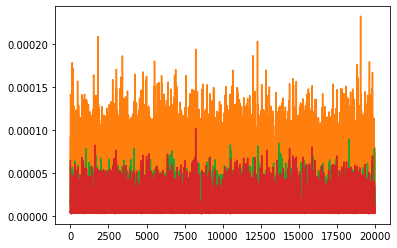

In [35]:
import matplotlib.pyplot as plt

plt.plot(sim7["afs"])

In [32]:
# This looks reasonable. Now let's see the effect of reduced covShared 
import copy
simParams3 = copy.copy(simParams2)
simParams3["covShared"] = tensor([[1.0, .7], [.7, 1.0]])
simParams3

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.7000],
         [0.7000, 1.0000]]),
 'covSingle': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [33]:
sim7 = genData.v6liability2(**simParams3)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.8590, -0.4095],
        [-0.6227, -0.1514],
        [-0.7239, -0.3861],
        ...,
        [-0.7221, -0.3199],
        [-0.6715, -0.2471],
        [-0.6799, -0.3540]])
allEffects[i] tensor([-0.8590, -0.4095])
PDBothGivenV.mean tensor(0.0108, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(8.3145, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0108], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.69738774]
 [0.69738774 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.86905131]
 [0.86905131 1.        ]]
PDBoth1GivenV t

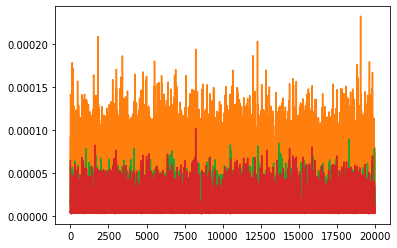

In [34]:
import matplotlib.pyplot as plt

plt.plot(sim7["afs"])

In [36]:
from mvl2.numpyro import model, infer

mcmc = infer(model, sim7["altCounts"].numpy(), simParams3["nCases"].numpy(), simParams3["nCtrls"].numpy())

sample: 100%|██████████| 1200/1200 [35:31<00:00,  1.78s/it, 127 steps of size 3.74e-02. acc. prob=0.90]

                 mean       std    median      5.0%     95.0%     n_eff     r_hat
    beta[0]      0.64      0.04      0.65      0.59      0.70    226.92      1.01
    beta[1]      0.38      0.04      0.38      0.31      0.46    280.91      1.00
    beta[2]      0.63      0.06      0.63      0.54      0.74    314.87      1.01
    beta[3]      0.81      0.08      0.82      0.68      0.93    721.87      1.00
    beta[4]      1.00      0.03      1.00      1.00      1.00    389.28      1.00
    beta[5]      0.97      0.11      1.00      0.96      1.00   1003.88      1.00
    beta[6]      0.97      0.12      1.00      0.95      1.00   1021.11      1.00
    beta[7]      0.98      0.09      1.00      0.98      1.00   1079.88      1.00
    beta[8]      0.97      0.13      1.00      0.96      1.00    636.50      1.00
    beta[9]      0.97      0.13      1.00      0.97      1.00   1126.80    

In [46]:
from mvl2.numpyro import  get_inferred_params

res, probs, conc, pis, beta = get_inferred_params(mcmc)

probs mean [[0.61533689 0.16742689 0.17168795 0.04554826]
 [0.35942737 0.45865033 0.10972838 0.07219392]
 [0.48252576 0.15236937 0.30617988 0.05892498]
 [0.24497967 0.38971839 0.18365133 0.18165061]
 [0.21286467 0.63476405 0.0730937  0.07927758]
 [0.07519916 0.20520015 0.19536965 0.52423104]
 [0.06115335 0.1955642  0.19204397 0.55123848]
 [0.06519695 0.20974474 0.18298689 0.54207142]
 [0.07102192 0.2110578  0.20199592 0.51592436]
 [0.0678371  0.19354226 0.19665064 0.54197   ]
 [0.07246636 0.19280982 0.1908434  0.54388042]
 [0.0720591  0.18743728 0.21213938 0.52836424]]
inferred stick-breaking weights mean:  [0.64312631 0.13434248 0.1423824  0.06632415 0.01735541 0.0010412
 0.00099963 0.00099895 0.0009944  0.00099894 0.000999   0.000999  ]
inferred stick-breaking weights stdd:  [0.03790266 0.01791785 0.03784542 0.02385075 0.03222768 0.03159135
 0.03159114 0.03158933 0.03144559 0.03158939 0.03159113 0.03159119]


In [49]:
empiricalAfs = sim7["altCounts"].sum(1) / (simParams3["nCtrls"] + simParams3["nCases"].sum())
empiricalAfs = empiricalAfs.expand([4, 20_000]).T
print(empiricalAfs)
print(empiricalAfs[sim7["unaffectedGenes"]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][0]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][1]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][2]].mean(0))


tensor([[3.2143e-04, 3.2143e-04, 3.2143e-04, 3.2143e-04],
        [1.4286e-04, 1.4286e-04, 1.4286e-04, 1.4286e-04],
        [9.5238e-05, 9.5238e-05, 9.5238e-05, 9.5238e-05],
        ...,
        [9.5238e-05, 9.5238e-05, 9.5238e-05, 9.5238e-05],
        [1.1905e-04, 1.1905e-04, 1.1905e-04, 1.1905e-04],
        [1.0714e-04, 1.0714e-04, 1.0714e-04, 1.0714e-04]], dtype=torch.float64)
tensor([0.0001, 0.0001, 0.0001, 0.0001], dtype=torch.float64)
tensor([0.0002, 0.0002, 0.0002, 0.0002], dtype=torch.float64)
tensor([0.0001, 0.0001, 0.0001, 0.0001], dtype=torch.float64)
tensor([0.0002, 0.0002, 0.0002, 0.0002], dtype=torch.float64)


In [50]:
(sim7["afs"][sim7["unaffectedGenes"]] / empiricalAfs[sim7["unaffectedGenes"]]).mean(0)

tensor([0.5634, 0.1677, 0.1677, 0.0447], dtype=torch.float64)

In [51]:
(sim7["afs"][sim7["affectedGenes"][0]] / empiricalAfs[sim7["affectedGenes"][0]]).mean(0)

tensor([0.3142, 0.4853, 0.0970, 0.0716], dtype=torch.float64)

In [52]:
(sim7["afs"][sim7["affectedGenes"][1]] / empiricalAfs[sim7["affectedGenes"][1]]).mean(0)

tensor([0.4681, 0.1416, 0.2845, 0.0598], dtype=torch.float64)

In [53]:
(sim7["afs"][sim7["affectedGenes"][2]] / empiricalAfs[sim7["affectedGenes"][2]]).mean(0)

tensor([0.2507, 0.3935, 0.1583, 0.1703], dtype=torch.float64)